# Prepared By: Isaiah Tschetter

-------------------------------------------------------------------------------------------------------------------------------------------------

# Task:
Global leaders in astronomy have identified that Earth is at risk of catastrophic damage from asteroid impacts. Therefore, to manage this risk, NASA is tasked with developing a risk report -- by analyzing and measuring key data points from certain asteroids. This risk report should begin by helping officials better visualize and understand the overall threat of asteroids by looking at how big they are, how often they nearly miss Earth, and how many of them have been identified as potentially hazardous objects (PHOs). Additionally, and more importantly, global leaders are interested in learning, from this report, the quantitative risk level of each asteroid and which asteroids need the most immediate attention.

I have chosen to pursue item 2, which is gathering data from an API. Specifically, NASA's asteroid data API.

-------------------------------------------------------------------------------------------------------------------------------------------------

# Data Dictionary:
| Variable | Description |
| --- | :--- |
| Name of Asteroid | Name of the asteroid. |
| Mid-Range Size Estimate (diameter -- in miles) | An average of the asteroid's minimum and maximum size estimates, in miles. |
| Is Potentially Hazardous?	 | Any asteroid that can itersect Earth's orbit with a distance of 4.65 million miles or less and/or are bigger than 500 feet in diameter are marked as potentially hazardous, according to NASA. This is denoted by a True or False value. Source: https://cneos.jpl.nasa.gov/about/neo_groups.html. |
| Frequency of Near Misses (from the years 1900-2200) | Number of near-Earth misses for an asteroid, from the years 1900-2200. A near-Earth miss is defined as an asteroid missing Earth by a distance of 93 million miles or less. Source: https://www.jpl.nasa.gov/topics/asteroids/ |
| Risk Score | Calculated by the following equation, for each asteroid: (1/3)*SizeValue + (1/3)*HazardousValue + (1/3)*FrequencyValue |
| SizeValue | Calculated by taking an asteroids size divided by the asteroid, in this dataset, with the largest size. |
| HazardousValue | If an asteroid is marked 'True' under the "Is Potentially Hazardous?" category, its HazardousValue is 1, else it is 0. |
| FrequencyValue | Calculated by taking an asteroids frequency of near misses divided by the asteroid, in this dataset, with the largest frequency of near misses. |

-------------------------------------------------------------------------------------------------------------------------------------------------

# Data Analysis:

Important Remark:

Many of the lines of code, here, are split up over multiple lines of code so that they wouldn't get cutoff when converting to PDF.

Library Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Loading Data

In [3]:
asteroids = pd.read_csv('TschetterProject1_Dataset.csv')
asteroids = asteroids.set_index('Name of Asteriod', drop=True)
asteroids

,Mid-Range Size Estimate (diameter -- in miles),Is Potentially Hazardous?,Frequency of Near Misses (from the years 1900-2200)
Name of Asteriod,,,
1981 Midas (1973 EA),2.349057,True,41
2059 Baboquivari (1963 UA),1.701742,False,17
2061 Anza (1960 UA),1.221500,False,17
2062 Aten (1976 AA),1.011332,False,128
2063 Bacchus (1977 HB),0.965814,False,174
...,...,...,...
5626 Melissabrucker (1991 FE),3.621543,False,13
5645 (1990 SP),0.956960,False,64
5646 (1990 TR),2.112971,False,13


-------------------------------------------------------------------------------------------------------------------------------------------------

First, we will be doing some data analysis with Pandas and Matplotlib to help officials understand the risk presented by these asteroids. To do so, we will look at how big they are, how often they nearly miss Earth, and whether or not they are classified as a potentially hazardous object.

We will start by looking at the biggest asteroids.

In [4]:
asteroids.sort_values(by='Mid-Range Size Estimate (diameter -- in miles)', 
                      ascending=False).head(10)

,Mid-Range Size Estimate (diameter -- in miles),Is Potentially Hazardous?,Frequency of Near Misses (from the years 1900-2200)
Name of Asteriod,,,
4954 Eric (1990 SQ),8.296475,False,17
3552 Don Quixote (1983 SA),6.559845,False,16
2212 Hephaistos (1978 SB),5.307544,False,78
5587 (1990 SB),4.455471,False,24
5143 Heracles (1991 VL),4.119966,False,72
3122 Florence (1981 ET3),4.044768,True,20
4183 Cuno (1959 LM),3.916459,True,54
5626 Melissabrucker (1991 FE),3.621543,False,13
3200 Phaethon (1983 TB),3.522846,True,80


It can be easily assumed that an asteroid as big as '4954 Eric (1990 SQ)' hitting Earth would have world-wide effects. 

Now, we will plot every asteroid's size. This should help officials understand which asteroids to target within their risk management efforts.

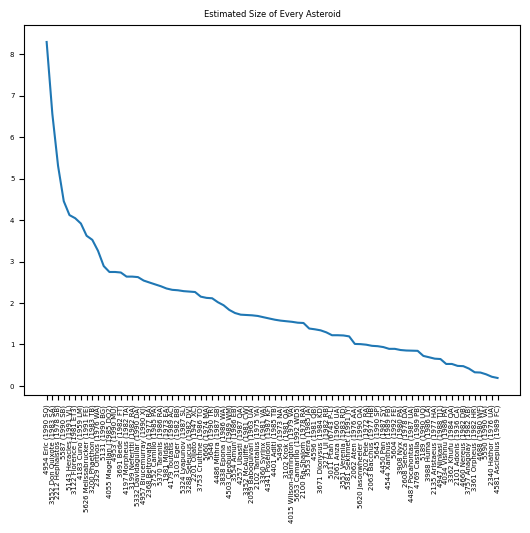

In [6]:
plt.plot(asteroids['Mid-Range Size Estimate (diameter -- in miles)'].
         sort_values(ascending=False))
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 5})
plt.title('Estimated Size of Every Asteroid')
plt.show()

# The following source showed me how to 
# decrease the font size of the text:
# https://www.geeksforgeeks.org/change-font-size-in-matplotlib/

We can see from the above chart that most asteroids are less than 3 miles in diameter. Hence, any asteroid that is more than 3 miles should at least be considered by the global risk management effort. 

-------------------------------------------------------------------------------------------------------------------------------------------------

Now, we will look at the asteroids with the most near-Earth misses.

In [5]:
asteroids.sort_values(by='Frequency of Near Misses (from the years 1900-2200)', 
                      ascending=False).head(10)

,Mid-Range Size Estimate (diameter -- in miles),Is Potentially Hazardous?,Frequency of Near Misses (from the years 1900-2200)
Name of Asteriod,,,
5604 (1992 FE),0.893087,True,237
2340 Hathor (1976 UA),0.219227,True,232
3362 Khufu (1984 QA),0.528316,True,217
4581 Asclepius (1989 FC),0.190061,True,198
4769 Castalia (1989 PB),0.845072,True,181
2100 Ra-Shalom (1978 RA),1.516679,False,175
2063 Bacchus (1977 HB),0.965814,False,174
4034 Vishnu (1986 PA),0.528316,True,169
3554 Amun (1986 EB),1.757493,False,165


It can be easily assumed that an object that nearly misses over 100 times is extremely dangerous.

Now, we will plot every asteroid's frequency of near-misses. This should help officials better understand which asteroids to target within their risk management efforts.

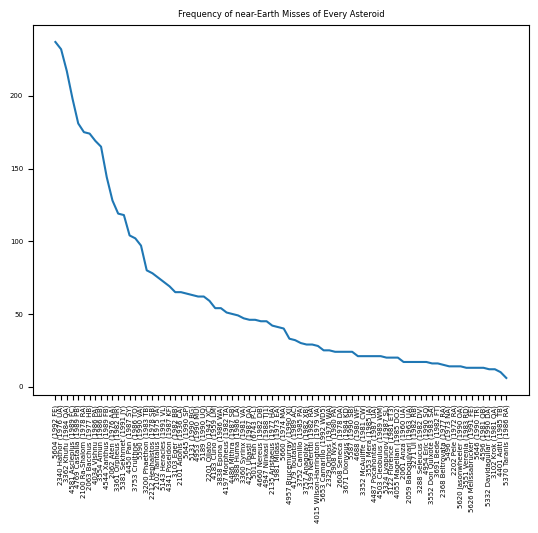

In [6]:
plt.plot(asteroids['Frequency of Near Misses (from the years 1900-2200)']
         .sort_values(ascending=False))
plt.xticks(rotation=90)
plt.rcParams.update({'font.size': 5})
plt.title('Frequency of near-Earth Misses of Every Asteroid')
plt.show()

# The following source showed me how to 
# decrease the font size of the text:
# https://www.geeksforgeeks.org/change-font-size-in-matplotlib/

Here, we can see that the vast majority of the asteroids have less than 75 near-Earth misses. Hence, anything higher than that should at least be considered by the global risk management effort. 

-------------------------------------------------------------------------------------------------------------------------------------------------

Now, we will look at how many of these asteroids are classified as "potentially hazardous."

In [7]:
# First, we know there are 80 asteroids being analyzed for this risk report.
# We will value count which ones are marked 'True' for potentially
# hazardous. 
percentDanger = (len(asteroids[asteroids['Is Potentially Hazardous?']
                                == True])/80)*100
print(f'{percentDanger}% of asteroids are potentially hazardous')

31.25% of asteroids are potentially hazardous


Therefore, we can conclude that at least 30% of the asteroids in question should at least be considered by the global risk management effort. 



-------------------------------------------------------------------------------------------------------------------------------------------------

### Next, we will assign a risk score to each of the asteroids using the following formula:

## Risk Score = 
# (1/3)SizeValue + (1/3)HazardousValue + (1/3)FrequencyValue

-------------------------------------------------------------------------------------------------------------------------------------------------

The '**SizeValue**' will be found by taking an asteroids size and dividing it by the size of the asteroid with the biggest size.

The '**FrequencyValue**' will be found by taking an asteroids frequency of near misses and dividing it by the frequency of near misses of the asteroid with the most near misses.

The '**HazardousValue**' will be '1' if the asteroid is marked 'True' under the category 'Is Potentially Hazardous?'

-------------------------------------------------------------------------------------------------------------------------------------------------

First, we begin by translating our potentially hazardous category to integer values.


In [8]:
asteroids['Is Potentially Hazardous?'] = asteroids[
    'Is Potentially Hazardous?'].apply(
        lambda x: 1 if x == True else 0)
asteroids

,Mid-Range Size Estimate (diameter -- in miles),Is Potentially Hazardous?,Frequency of Near Misses (from the years 1900-2200)
Name of Asteriod,,,
1981 Midas (1973 EA),2.349057,1,41
2059 Baboquivari (1963 UA),1.701742,0,17
2061 Anza (1960 UA),1.221500,0,17
2062 Aten (1976 AA),1.011332,0,128
2063 Bacchus (1977 HB),0.965814,0,174
...,...,...,...
5626 Melissabrucker (1991 FE),3.621543,0,13
5645 (1990 SP),0.956960,0,64
5646 (1990 TR),2.112971,0,13


Now, we will calculate our risk score values for every asteroid. Those scores will be inserted into the asteroids DataFrame. 

In [9]:
# Now, we will calculate the 'Risk Score' and insert it 
# into the table as a new column titled 'Risk Score.'
SizeValue = asteroids['Mid-Range Size Estimate (diameter -- in miles)']/asteroids[
    'Mid-Range Size Estimate (diameter -- in miles)'].max()

HazardousValue = asteroids['Is Potentially Hazardous?']

FrequencyValue = asteroids[
    'Frequency of Near Misses (from the years 1900-2200)']/asteroids[
    'Frequency of Near Misses (from the years 1900-2200)'].max()

asteroids[
    'Risk Score'] = (1/3)*SizeValue + (1/3)*HazardousValue + (
        1/3)*FrequencyValue

asteroids

,Mid-Range Size Estimate (diameter -- in miles),Is Potentially Hazardous?,Frequency of Near Misses (from the years 1900-2200),Risk Score
Name of Asteriod,,,,
1981 Midas (1973 EA),2.349057,1,41,0.485378
2059 Baboquivari (1963 UA),1.701742,0,17,0.092282
2061 Anza (1960 UA),1.221500,0,17,0.072987
2062 Aten (1976 AA),1.011332,0,128,0.220661
2063 Bacchus (1977 HB),0.965814,0,174,0.283530
...,...,...,...,...
5626 Melissabrucker (1991 FE),3.621543,0,13,0.163789
5645 (1990 SP),0.956960,0,64,0.128463
5646 (1990 TR),2.112971,0,13,0.103178


### To finish, we will do some quick visualization and analysis of the risk scores. The goal is to identify the asteroids that require the most immediate attention. 

First, we will look at the ten asteroids with the highest risk score. 

In [44]:
# First, we will look at the top ten asteroids that provide the most risk to Earth:
asteroids.sort_values(by='Risk Score', ascending=False).head(10)

,Mid-Range Size Estimate (diameter -- in miles),Is Potentially Hazardous?,Frequency of Near Misses (from the years 1900-2200),Risk Score
Name of Asteriod,,,,
5604 (1992 FE),0.893087,1,237,0.702549
2340 Hathor (1976 UA),0.219227,1,232,0.668442
3362 Khufu (1984 QA),0.528316,1,217,0.659764
4769 Castalia (1989 PB),0.845072,1,181,0.621857
4581 Asclepius (1989 FC),0.190061,1,198,0.619451
4034 Vishnu (1986 PA),0.528316,1,169,0.592253
3200 Phaethon (1983 TB),3.522846,1,80,0.587391
4183 Cuno (1959 LM),3.916459,1,54,0.566637
4953 (1990 MU),2.747221,1,62,0.530911


We can conclude from the above table that those 10 asteroids pose the greatest threat to Earth and should be highlighted in the global leaders' risk management effort.

Next, we will plot the normal distribution/bell curve of these risk scores. That will give us a better idea on what asteroids fall under the category of "requiring the most immediate attention."

Text(0.5, 1.0, 'Bell Curve of the Risk Score for Every Asteroid')

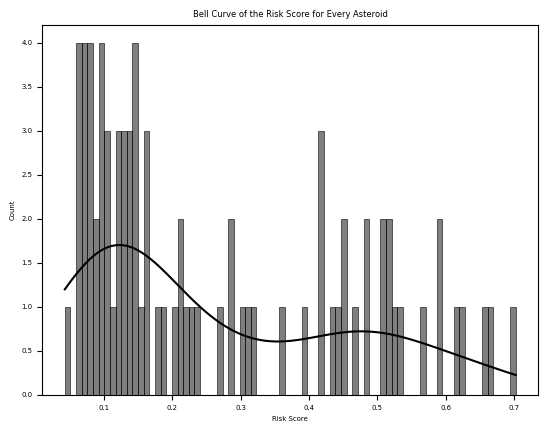

In [54]:
sns.histplot(asteroids['Risk Score'], bins=80, color='k', kde=True)
plt.title('Bell Curve of the Risk Score for Every Asteroid')

# The following source helped me 
# learn how to use seaborn's
# histplot() command:
# https://seaborn.pydata.org/generated/seaborn.histplot.html


The above bell curve shows us that most asteroids have a risk level under 0.4. Hence, officials should strongly consider implementing risk management efforts for any asteroid with a risk score of 0.4 or greater.

### Therefore, as supported by the bell curve above, all asteroids with a risk score of 0.4 or greater will be considered asteroids "requiring the most immediate attention."

To close out this report, we will calculate the number of asteroids that have been determined to require the most immediate attention.

In [57]:
requireManagement = len(asteroids[asteroids['Risk Score'] >= 0.4])
print(
    f'There are {requireManagement} asteroids that require immediate risk management!')
# It is not possible, for this line, 
# to split be up so that it all shows up
# in the PDF, I believe.

There are 24 asteroids that require immediate risk management!


-------------------------------------------------------------------------------------------------------------------------------------------------

The following asteroids will therefore be submitted for review as they require the most immediate attention due their high risk score:

In [60]:
highvalueAsteroids = asteroids[asteroids['Risk Score'] >= 0.4]

highvalueAsteroids.sort_values(by='Risk Score', ascending=False)

,Mid-Range Size Estimate (diameter -- in miles),Is Potentially Hazardous?,Frequency of Near Misses (from the years 1900-2200),Risk Score
Name of Asteriod,,,,
5604 (1992 FE),0.893087,1,237,0.702549
2340 Hathor (1976 UA),0.219227,1,232,0.668442
3362 Khufu (1984 QA),0.528316,1,217,0.659764
4769 Castalia (1989 PB),0.845072,1,181,0.621857
4581 Asclepius (1989 FC),0.190061,1,198,0.619451
4034 Vishnu (1986 PA),0.528316,1,169,0.592253
3200 Phaethon (1983 TB),3.522846,1,80,0.587391
4183 Cuno (1959 LM),3.916459,1,54,0.566637
4953 (1990 MU),2.747221,1,62,0.530911


-------------------------------------------------------------------------------------------------------------------------------------------------

# Summary of Findings

So, to summerize the risk report, NASA has first been tasked with helping officials understand the following characteristics of the asteroids in question: how big these asteroids are, how often they nearly miss Earth, and how many of them are considered potentially hazardous. To summerize the findings pertaining to that first task, NASA has uncovered the following: the asteroids being studied range anywhere from less than one mile in diameter all the way up to 8 miles in diameter, the asteroids nearly miss earth anywhere from less than 25 times to more than 200 times in a 300 year period, and over 30 percent of the asteroids in question have been identified as potentially hazardous. Secondly, NASA has been tasked with developing a quantitative risk value for all of the asteroids in question and identifying which asteroids need the most immediate attention from our global risk management effort. This report has done exactly that by developing a risk score for every asteroid using the following formula: "(1/3)*SizeValue + (1/3)*HazardousValue + (1/3)*FrequencyValue." From there, NASA has identified every asteroid with a risk score of 0.4 or greater as an asteroid that need the most immediate attention. That list of asteroids requiring the most immediate attention will be submitted to global officials for further review. 

-------------------------------------------------------------------------------------------------------------------------------------------------